In [1]:
import numpy as np
import ast
import matplotlib.pyplot as plt
from collections import OrderedDict
from google.colab import files
uploaded = files.upload()

Saving outputAug.py to outputAug.py
Saving outputJul.py to outputJul.py
Saving outputJun.py to outputJun.py
Saving outputMay.py to outputMay.py
Saving outputOct.py to outputOct.py
Saving outputSep.py to outputSep.py


In [2]:
mainDir = "/content"


mayFile = open((mainDir+"/outputMay.py"), "r")
mayData = mayFile.read()
mayData = ast.literal_eval(mayData)
mayFile.close()

junFile = open((mainDir+"/outputJun.py"), "r")
junData = junFile.read()
junData = ast.literal_eval(junData)
junFile.close()

julFile = open((mainDir+"/outputJul.py"), "r")
julData = julFile.read()
julData = ast.literal_eval(julData)
julFile.close()

augFile = open((mainDir+"/outputAug.py"), "r")
augData = augFile.read()
augData = ast.literal_eval(augData)
augFile.close()

sepFile = open((mainDir+"/outputSep.py"), "r")
sepData = sepFile.read()
sepData = ast.literal_eval(sepData)
sepFile.close()

octFile = open((mainDir+"/outputOct.py"), "r")
octData = octFile.read()
octData = ast.literal_eval(octData)
octFile.close()

In [3]:
ttlList = []

def filterData(allData):
	ipDict = {}
	for ip in allData['ikettle']:
		ipDict[ip] = []
		for dns in allData['ikettle'][ip]:
			ttlList.append(float(dns[1]))
			ipDict[ip].append(dns[0])
	return ipDict

mayFilteredData = filterData(mayData)
junFilteredData = filterData(junData)
julFilteredData = filterData(julData)
augFilteredData = filterData(augData)
sepFilteredData = filterData(sepData)
octFilteredData = filterData(octData)

In [4]:
monthIPCount = {}
monthIPCount['May'] = len(mayFilteredData)
monthIPCount['June'] = len(junFilteredData)
monthIPCount['July'] = len(julFilteredData)
monthIPCount['August'] = len(augFilteredData)
monthIPCount['September'] = len(sepFilteredData)
monthIPCount['October'] = len(octFilteredData)

print(monthIPCount)

{'May': 5, 'June': 18, 'July': 5, 'August': 5, 'September': 5, 'October': 6}


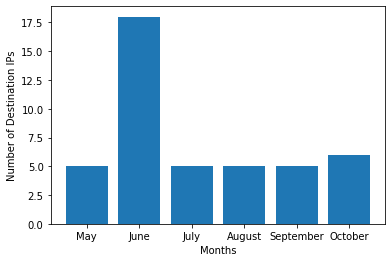

In [7]:
ipKeys = monthIPCount.keys()
ipValues = monthIPCount.values()
plt.xlabel('Months')
plt.ylabel('Number of Destination IPs')

plt.bar(ipKeys, ipValues)
plt.savefig('destinationIP_vs_Months.png')

In [8]:
pip install venn

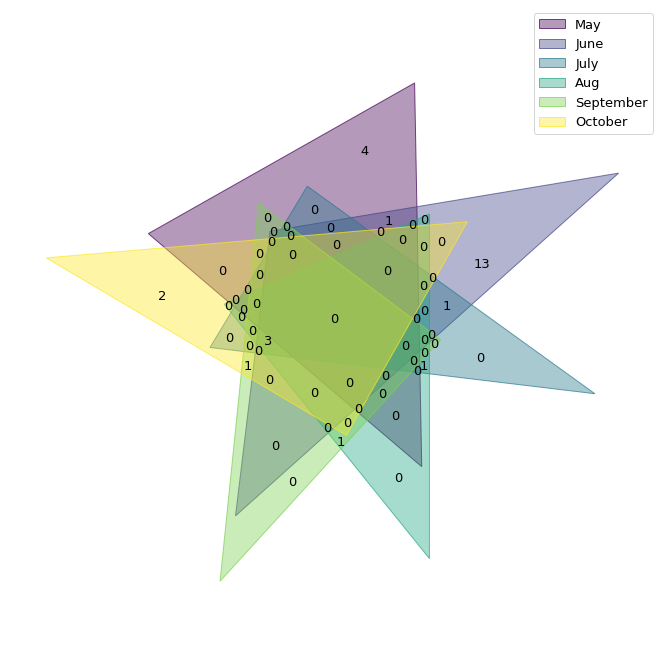

In [10]:
from venn import venn
labels = ['May','June','July','Aug','September','October']
sets = {
    labels[0]: set(mayFilteredData.keys()),
    labels[1]: set(junFilteredData.keys()),
    labels[2]: set(julFilteredData.keys()),
    labels[3]: set(augFilteredData.keys()),
    labels[4]: set(sepFilteredData.keys()),
    labels[5]: set(octFilteredData.keys())
}
fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.savefig('destinationIP_vs_Months_venn.png')

In [11]:
#June month seems to be abnormal
allIP = list(mayFilteredData.keys()) + list(julFilteredData.keys()) + list(augFilteredData.keys()) + list(sepFilteredData.keys()) + list(octFilteredData.keys())
juneExtraIP = []
for jIP in junFilteredData:
  if jIP not in allIP:
    juneExtraIP.append(jIP)

print('June Extra IPS', juneExtraIP)
print(len(juneExtraIP))

June Extra IPS ['192.203.230.10', '192.33.4.12', '192.36.148.17', '199.7.91.13', '202.12.27.33', '199.7.83.42', '192.5.5.241', '192.58.128.30', '199.9.14.201', '198.97.190.53', '192.112.36.4', '198.41.0.4', '193.0.14.129']
13


In [12]:
mayDomainDict = {}
for domainList in mayFilteredData.values():
  for domain in domainList:
    if domain not in mayDomainDict:
      mayDomainDict[domain] = 1
    else:
      mayDomainDict[domain] += 1
print('may', mayDomainDict)

junDomainDict = {}
for domainList in junFilteredData.values():
  for domain in domainList:
    if domain not in junDomainDict:
      junDomainDict[domain] = 1
    else:
      junDomainDict[domain] += 1
print('jun', junDomainDict)

julDomainDict = {}
for domainList in julFilteredData.values():
  for domain in domainList:
    if domain not in julDomainDict:
      julDomainDict[domain] = 1
    else:
      julDomainDict[domain] += 1
print('jul', julDomainDict)

augDomainDict = {}
for domainList in augFilteredData.values():
  for domain in domainList:
    if domain not in augDomainDict:
      augDomainDict[domain] = 1
    else:
      augDomainDict[domain] += 1
print('aug', augDomainDict)

sepDomainDict = {}
for domainList in sepFilteredData.values():
  for domain in domainList:
    if domain not in sepDomainDict:
      sepDomainDict[domain] = 1
    else:
      sepDomainDict[domain] += 1
print('sep', sepDomainDict)

octDomainDict = {}
for domainList in octFilteredData.values():
  for domain in domainList:
    if domain not in octDomainDict:
      octDomainDict[domain] = 1
    else:
      octDomainDict[domain] += 1
print('oct', octDomainDict)

may {'prd17a.boxen.electricimp.com': 48, 'upgrades.electricimp.com': 2, 'imp-40.electricimp.com': 25}
jun {'imp-42.electricimp.com': 64, 'prd17a.boxen.electricimp.com': 107, 'prd19b.boxen.electricimp.com': 2}
jul {'prd09b.boxen.electricimp.com': 22, 'prd19b.boxen.electricimp.com': 9, 'imp-42.electricimp.com': 8}
aug {'prd09b.boxen.electricimp.com': 52, 'prd14a.boxen.electricimp.com': 4, 'imp-42.electricimp.com': 16}
sep {'prd14a.boxen.electricimp.com': 25, 'prd06a.boxen.electricimp.com': 8, 'imp-42.electricimp.com': 9}
oct {'prd12b.boxen.electricimp.com': 6, 'prd02a.boxen.electricimp.com': 18, 'imp-42.electricimp.com': 8, 'prd06a.boxen.electricimp.com': 2}


In [ ]:
"""
After careful observation of these domain names we can observe a few things-
1. There are mainly 2 types of domain names-
  a. imp-xx-electricimp.com
  b. prdxxx.boxen.electricimp.com
  Exception in May2021- upgrades.electricimp.com (may be because Software is getting updated)

2. imp-xx.... domain name changes only after May (when there was upgrades domain name)

3. One of prdxxx format domain name is present for consecutive 2 months, so 1 such domain name is common in 2 months
"""

'\nAfter careful observation of these domain names we can observe a few things-\n1. There are mainly 2 types of domain names-\n  a. imp-xx-electricimp.com\n  b. prdxxx.boxen.electricimp.com\n  Exception in May2021- upgrades.electricimp.com (may be because Software is getting updated)\n\n2. imp-xx.... domain name changes only after May (when there was upgrades domain name)\n\n3. One of prdxxx format domain name is present for consecutive 2 months, so 1 such domain name is common in 2 months\n'

In [13]:
domainCount = {}
domainCount['May'] = sum(mayDomainDict.values())
domainCount['June'] = sum(junDomainDict.values())
domainCount['July'] = sum(julDomainDict.values())
domainCount['August'] = sum(augDomainDict.values())
domainCount['September'] = sum(sepDomainDict.values())
domainCount['October'] = sum(octDomainDict.values())

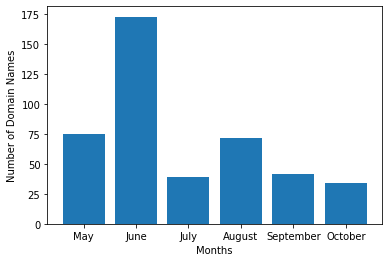

In [15]:
domainKeys = domainCount.keys()
domainValues = domainCount.values()
plt.xlabel('Months')
plt.ylabel('Number of Domain Names')

plt.bar(domainKeys, domainValues)
plt.savefig('domainNames_vs_Months.png')

In [16]:
import pandas as pd
ttlDF = pd.DataFrame(ttlList)
print('TTL', ttlDF.describe())

TTL                   0
count  4.350000e+02
mean   1.626108e+09
std    3.977177e+06
min    1.621555e+09
25%    1.623621e+09
50%    1.623741e+09
75%    1.628329e+09
max    1.635358e+09
